In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
# Import modules from src
import sys
sys.path.append('../src/')  # Add src to path
import pandas as pd

In [6]:
df = pd.read_csv('../datasets/processed/sentiment_theme.csv', parse_dates=['date'])

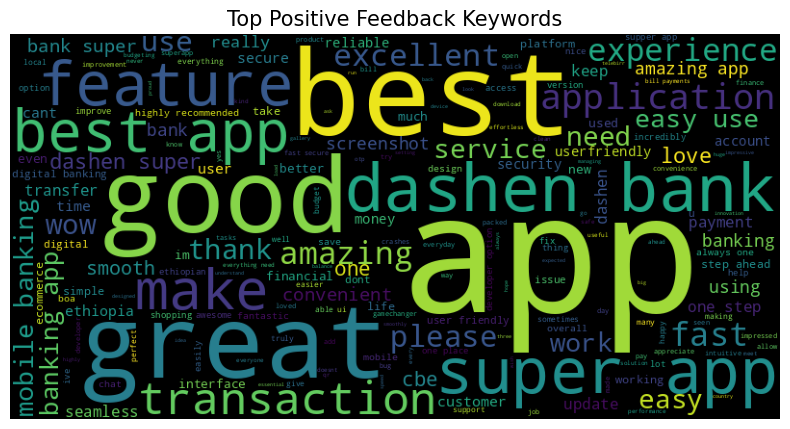

In [8]:
# Top positive keywords
positive_reviews = df[df['sentiment'] > 0.5]
wc = WordCloud(width=800, height=400).generate(' '.join(positive_reviews['processed_review']))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.title('Top Positive Feedback Keywords', fontsize=15)
plt.axis('off')
plt.show()

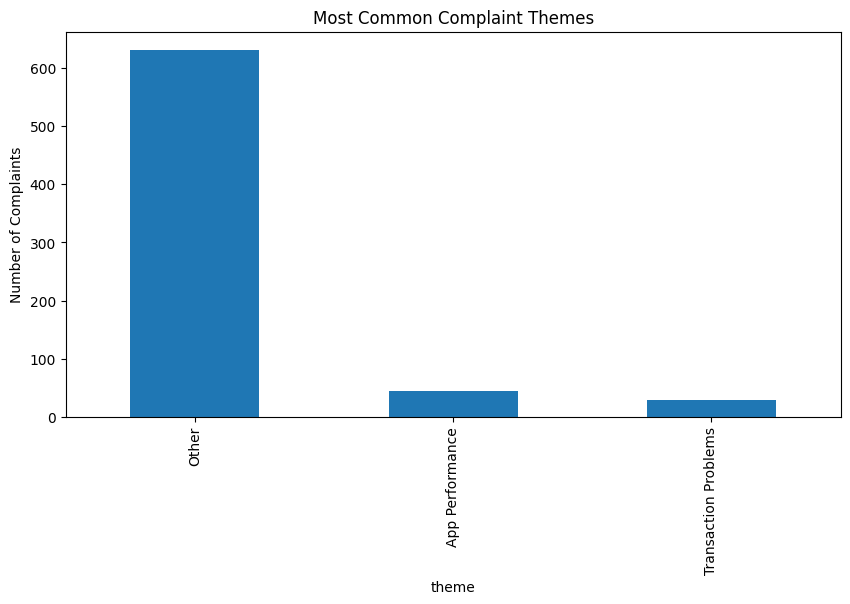

In [9]:
negative_reviews = df[df['sentiment'] < 0.3]
pain_points = negative_reviews.groupby('theme')['review'].count().sort_values(ascending=False)
pain_points.plot(kind='bar', title='Most Common Complaint Themes', figsize=(10,5))
plt.ylabel('Number of Complaints')
plt.show()

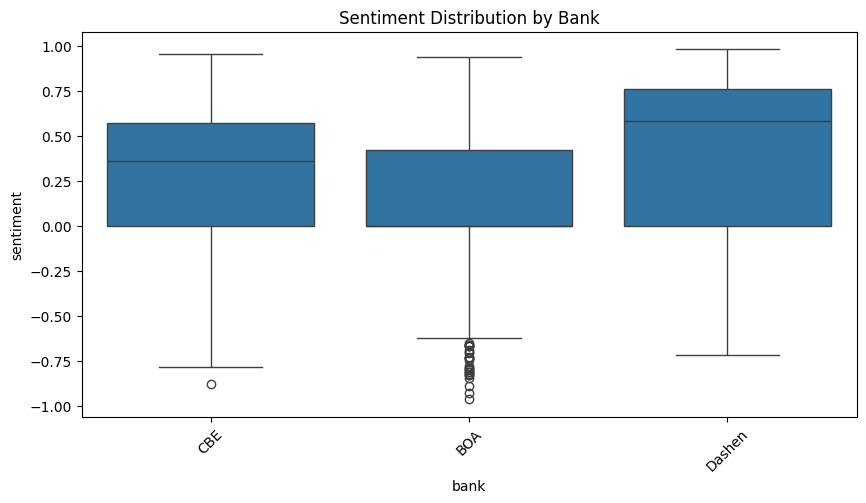

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='bank', y='sentiment')
plt.title('Sentiment Distribution by Bank')
plt.xticks(rotation=45)
plt.show()

In [12]:
df.dropna(subset=['processed_review'], inplace=True)

71 reviews mention performance issues


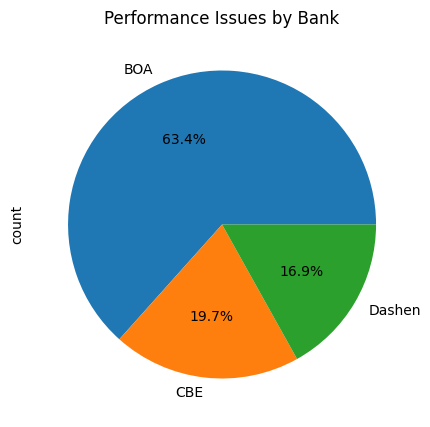

In [13]:
performance_issues = df[df['processed_review'].str.contains('slow|lag|crash', case=False)]
print(f"{len(performance_issues)} reviews mention performance issues")
plt.figure(figsize=(8,5))
performance_issues['bank'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Performance Issues by Bank')
plt.show()

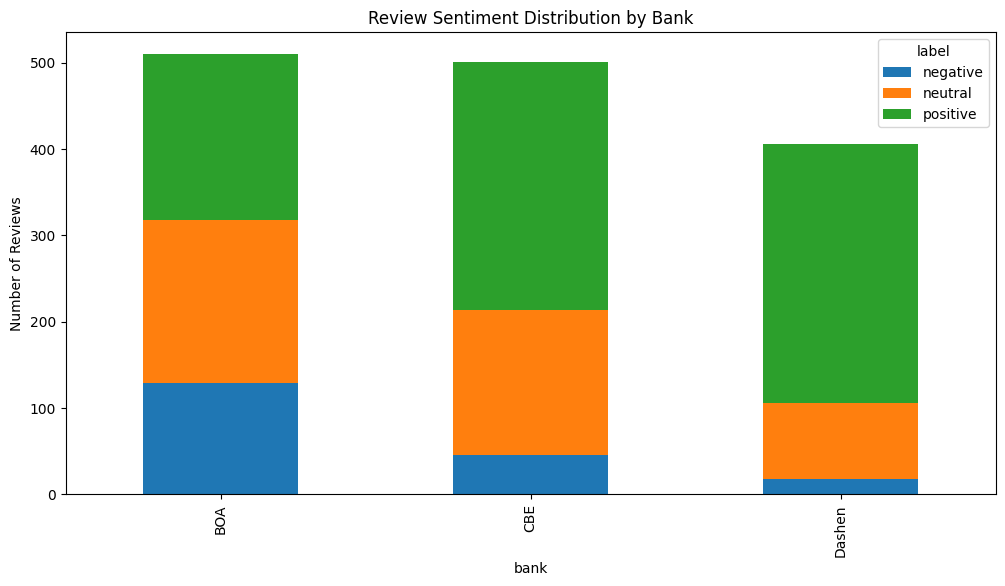

In [14]:
rating_comparison = df.groupby(['bank','label'])['review'].count().unstack()
rating_comparison.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Review Sentiment Distribution by Bank')
plt.ylabel('Number of Reviews')
plt.show()

71 reviews mention performance issues


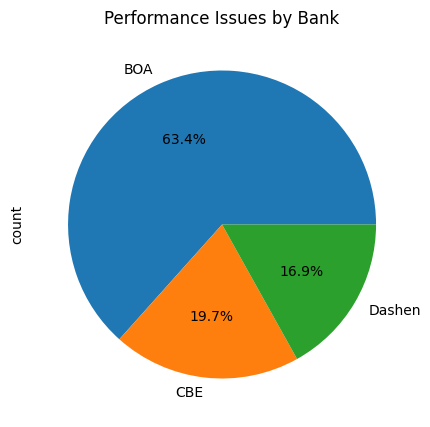

In [15]:
performance_issues = df[df['processed_review'].str.contains('slow|lag|crash', case=False)]
print(f"{len(performance_issues)} reviews mention performance issues")
plt.figure(figsize=(8,5))
performance_issues['bank'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Performance Issues by Bank')
plt.show()

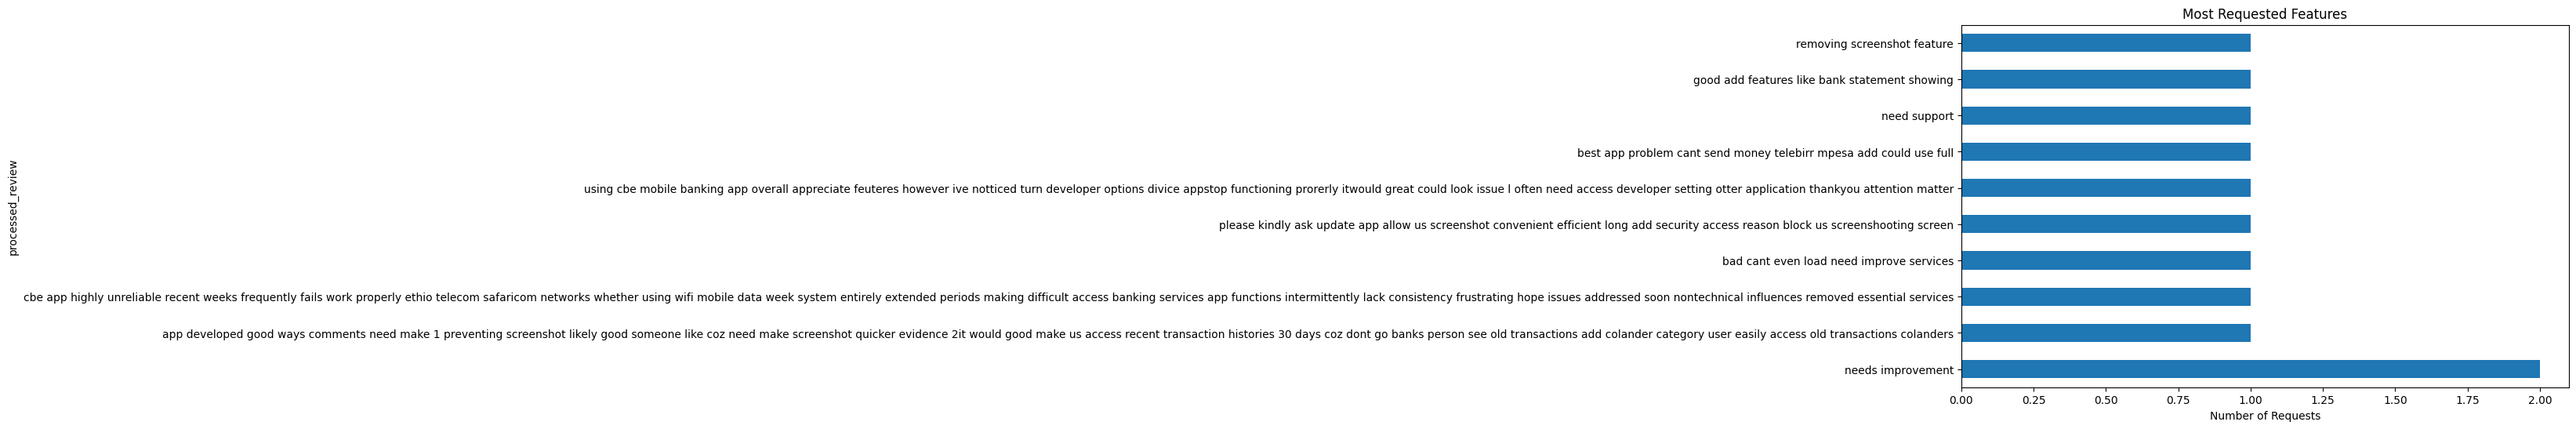

In [16]:
feature_requests = df[df['processed_review'].str.contains('add|need|want|feature', case=False)]
top_requests = feature_requests['processed_review'].value_counts().head(10)
top_requests.plot(kind='barh', figsize=(10,6))
plt.title('Most Requested Features')
plt.xlabel('Number of Requests')
plt.show()

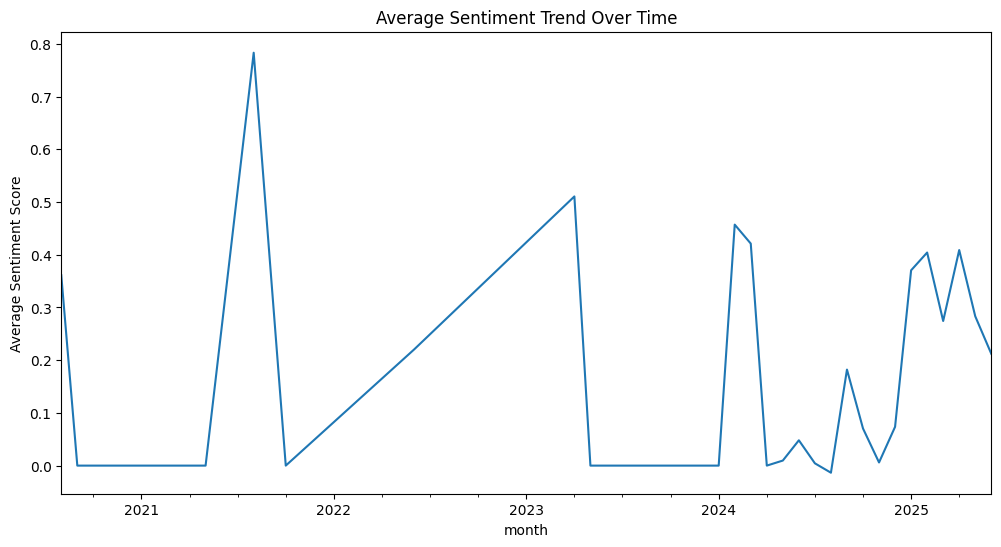

In [17]:
df['month'] = df['date'].dt.to_period('M')
sentiment_trend = df.groupby('month')['sentiment'].mean()
sentiment_trend.plot(figsize=(12,6))
plt.title('Average Sentiment Trend Over Time')
plt.ylabel('Average Sentiment Score')
plt.show()

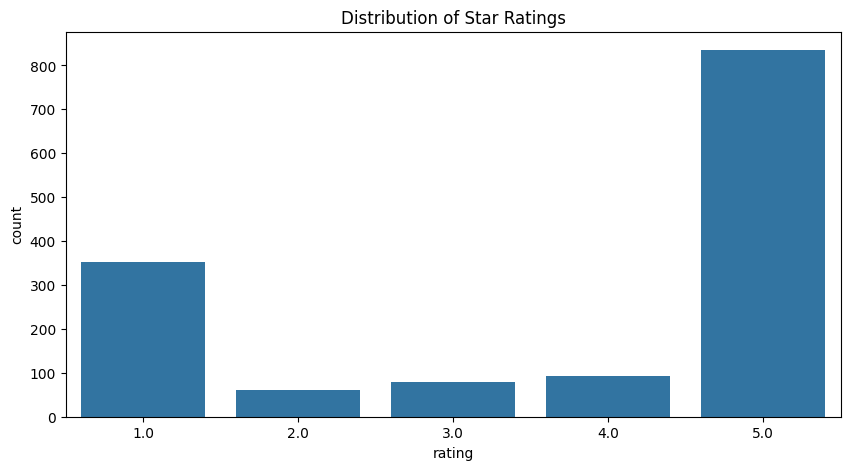

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating')
plt.title('Distribution of Star Ratings')
plt.show()